In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Print TensorFlow version to verify installation
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


In [2]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Print dataset shape
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("\nClass names:", class_names)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


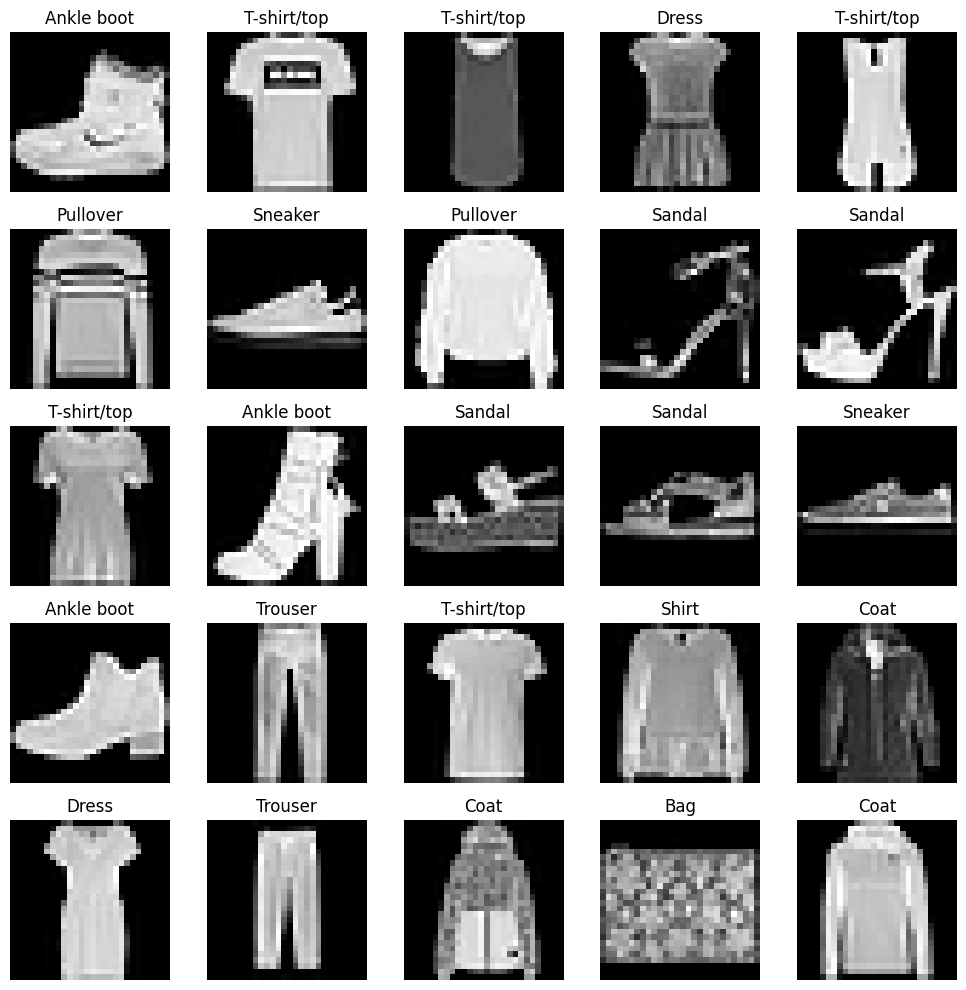


Label distribution in training set:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


In [3]:
# Create a figure to display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print unique labels and their distribution
unique, counts = np.unique(y_train, return_counts=True)
print("\nLabel distribution in training set:")
for i in range(len(unique)):
    print(f"{class_names[unique[i]]}: {counts[i]}")

In [4]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Print data statistics after normalization
print("Training data - min:", x_train.min(), "max:", x_train.max())
print("Test data - min:", x_test.min(), "max:", x_test.max())

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"\nAfter splitting:")
print(f"Training data: {x_train.shape}")
print(f"Validation data: {x_val.shape}")
print(f"Test data: {x_test.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Validation labels: {y_val.shape}")
print(f"Test labels: {y_test.shape}")

Training data - min: 0.0 max: 1.0
Test data - min: 0.0 max: 1.0

After splitting:
Training data: (48000, 28, 28)
Validation data: (12000, 28, 28)
Test data: (10000, 28, 28)
Training labels: (48000,)
Validation labels: (12000,)
Test labels: (10000,)


In [5]:
# Build ANN Model
ann_model = keras.Sequential([
    # Flatten the 28x28 images to 1D array of 784 pixels
    layers.Flatten(input_shape=(28, 28)),

    # First hidden layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    # Second hidden layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    # Output layer with 10 units for 10 classes
    layers.Dense(10, activation='softmax')
])

# Compile the model
ann_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("ANN Model Architecture:")
ann_model.summary()

ANN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Set training parameters
epochs = 15
batch_size = 32

# Train the ANN model
print("Training ANN model...")
ann_history = ann_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose=1
)

# Print final training and validation accuracy
final_train_acc = ann_history.history['accuracy'][-1]
final_val_acc = ann_history.history['val_accuracy'][-1]
print(f"\nANN Final Training Accuracy: {final_train_acc:.4f}")
print(f"ANN Final Validation Accuracy: {final_val_acc:.4f}")

Training ANN model...
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6860 - loss: 0.8944 - val_accuracy: 0.8485 - val_loss: 0.4271
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8258 - loss: 0.4895 - val_accuracy: 0.8655 - val_loss: 0.3687
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8401 - loss: 0.4451 - val_accuracy: 0.8702 - val_loss: 0.3615
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8503 - loss: 0.4140 - val_accuracy: 0.8665 - val_loss: 0.3662
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8575 - loss: 0.3950 - val_accuracy: 0.8773 - val_loss: 0.3343
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8620 - loss: 0.3800 - val_accuracy: 0.8765 - val_loss: 0.3511
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8650 - loss: 0.3696 - val_accuracy: 0.8751 - val_loss: 0.3428
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.

Evaluating ANN model on test set...
ANN Test Accuracy: 0.8747


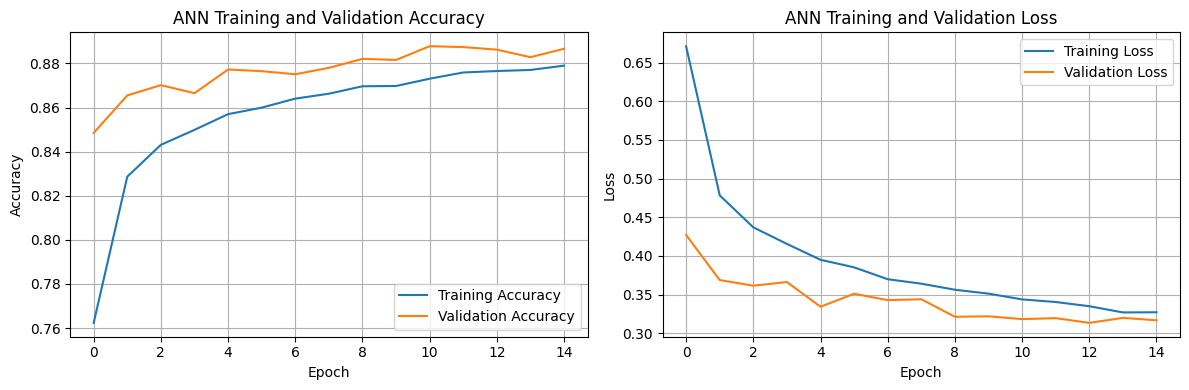


ANN Performance Summary:
Training Accuracy: 0.8790
Validation Accuracy: 0.8867
Test Accuracy: 0.8747


In [7]:
# Evaluate ANN model on test set
print("Evaluating ANN model on test set...")
ann_test_loss, ann_test_accuracy = ann_model.evaluate(x_test, y_test, verbose=0)
print(f"ANN Test Accuracy: {ann_test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nANN Performance Summary:")
print(f"Training Accuracy: {ann_history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {ann_history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {ann_test_accuracy:.4f}")

In [8]:
# Reshape data for CNN (add channel dimension for grayscale)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_val_cnn = x_val.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

print("Reshaped data for CNN:")
print(f"Training data: {x_train_cnn.shape}")
print(f"Validation data: {x_val_cnn.shape}")
print(f"Test data: {x_test_cnn.shape}")

# Build CNN Model
cnn_model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.25),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\nCNN Model Architecture:")
cnn_model.summary()

Reshaped data for CNN:
Training data: (48000, 28, 28, 1)
Validation data: (12000, 28, 28, 1)
Test data: (10000, 28, 28, 1)

CNN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Set training parameters (same as ANN for fair comparison)
epochs = 15
batch_size = 32

# Train the CNN model
print("Training CNN model...")
cnn_history = cnn_model.fit(
    x_train_cnn, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val_cnn, y_val),
    verbose=1
)

# Print final training and validation accuracy
final_train_acc_cnn = cnn_history.history['accuracy'][-1]
final_val_acc_cnn = cnn_history.history['val_accuracy'][-1]
print(f"\nCNN Final Training Accuracy: {final_train_acc_cnn:.4f}")
print(f"CNN Final Validation Accuracy: {final_val_acc_cnn:.4f}")

Training CNN model...
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.5987 - loss: 1.0856 - val_accuracy: 0.8131 - val_loss: 0.4709
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.7981 - loss: 0.5426 - val_accuracy: 0.8503 - val_loss: 0.3917
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - accuracy: 0.8291 - loss: 0.4721 - val_accuracy: 0.8727 - val_loss: 0.3505
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8503 - loss: 0.4145 - val_accuracy: 0.8861 - val_loss: 0.3168
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8595 - loss: 0.3880 - val_accuracy: 0.8902 - val_loss: 0.3015
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8635 - loss: 0.3848 - val_accuracy: 0.8882 - val_loss: 0.2954
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8700 - loss: 0.3598 - val_accuracy: 0.8975 - val_loss: 0.2809
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/ste

Evaluating CNN model on test set...
CNN Test Accuracy: 0.8980


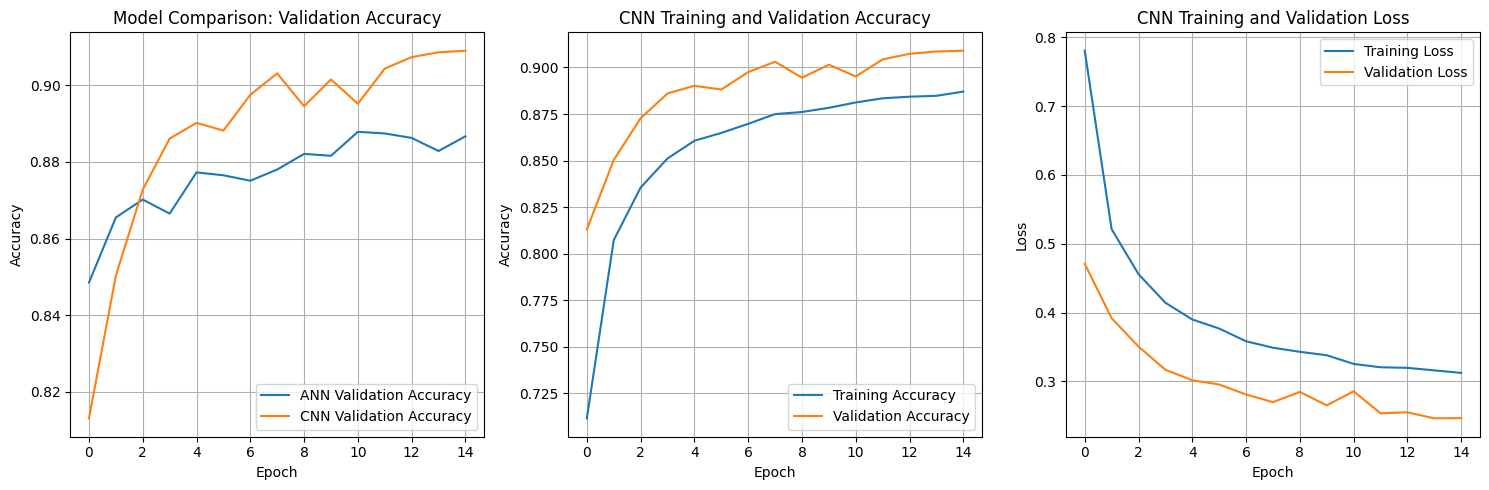


MODEL COMPARISON SUMMARY
ANN Model:
  - Training Accuracy:   0.8790
  - Validation Accuracy: 0.8867
  - Test Accuracy:       0.8747

CNN Model:
  - Training Accuracy:   0.8870
  - Validation Accuracy: 0.9090
  - Test Accuracy:       0.8980

CNN improvement over ANN: +0.0233 (2.33%)


In [10]:
# Evaluate CNN model on test set
print("Evaluating CNN model on test set...")
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_accuracy:.4f}")

# Plot training history for both models
plt.figure(figsize=(15, 5))

# Plot accuracy comparison
plt.subplot(1, 3, 1)
plt.plot(ann_history.history['val_accuracy'], label='ANN Validation Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Model Comparison: Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot CNN training history
plt.subplot(1, 3, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot CNN loss history
plt.subplot(1, 3, 3)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print comprehensive comparison
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
print(f"ANN Model:")
print(f"  - Training Accuracy:   {ann_history.history['accuracy'][-1]:.4f}")
print(f"  - Validation Accuracy: {ann_history.history['val_accuracy'][-1]:.4f}")
print(f"  - Test Accuracy:       {ann_test_accuracy:.4f}")

print(f"\nCNN Model:")
print(f"  - Training Accuracy:   {cnn_history.history['accuracy'][-1]:.4f}")
print(f"  - Validation Accuracy: {cnn_history.history['val_accuracy'][-1]:.4f}")
print(f"  - Test Accuracy:       {cnn_test_accuracy:.4f}")

improvement = cnn_test_accuracy - ann_test_accuracy
print(f"\nCNN improvement over ANN: +{improvement:.4f} ({improvement*100:.2f}%)")

Re-evaluating models for precise accuracy...
ANN Test Accuracy: 0.8747
CNN Test Accuracy: 0.8980

Generating predictions for confusion matrices...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


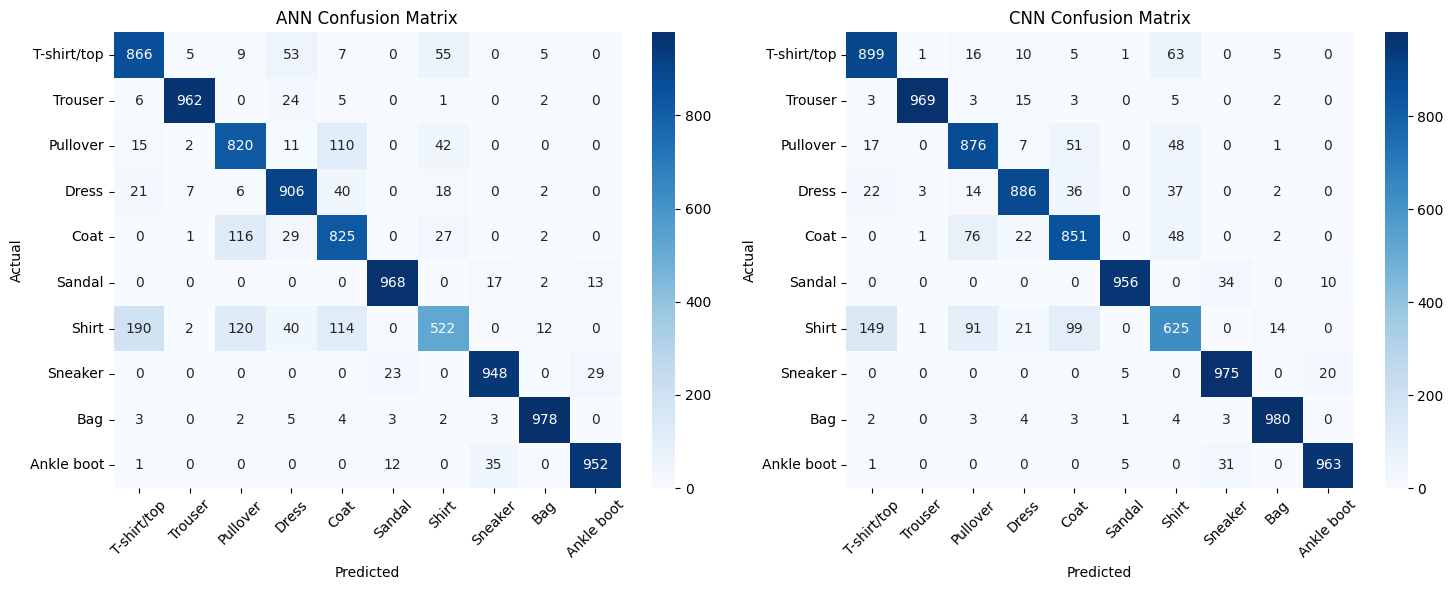


FINAL MODEL COMPARISON
Metric                    ANN        CNN        Difference
------------------------------------------------------------
Training Accuracy         0.8790     0.8870     +0.0080
Validation Accuracy       0.8867     0.9090     +0.0223
Test Accuracy             0.8747     0.8980     +0.0233


In [11]:
# Re-evaluate both models to get precise accuracy
print("Re-evaluating models for precise accuracy...")
ann_test_loss, ann_test_accuracy = ann_model.evaluate(x_test, y_test, verbose=0)
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)

print(f"ANN Test Accuracy: {ann_test_accuracy:.4f}")
print(f"CNN Test Accuracy: {cnn_test_accuracy:.4f}")

# Generate predictions for confusion matrices
print("\nGenerating predictions for confusion matrices...")
ann_predictions = ann_model.predict(x_test)
cnn_predictions = cnn_model.predict(x_test_cnn)

ann_pred_classes = np.argmax(ann_predictions, axis=1)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

# Create confusion matrices
ann_cm = confusion_matrix(y_test, ann_pred_classes)
cnn_cm = confusion_matrix(y_test, cnn_pred_classes)

# Plot confusion matrices
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Print final comparison
print("\n" + "="*60)
print("FINAL MODEL COMPARISON")
print("="*60)
print(f"{'Metric':<25} {'ANN':<10} {'CNN':<10} {'Difference'}")
print(f"{'-'*60}")
print(f"{'Training Accuracy':<25} {ann_history.history['accuracy'][-1]:<10.4f} {cnn_history.history['accuracy'][-1]:<10.4f} {cnn_history.history['accuracy'][-1]-ann_history.history['accuracy'][-1]:+.4f}")
print(f"{'Validation Accuracy':<25} {ann_history.history['val_accuracy'][-1]:<10.4f} {cnn_history.history['val_accuracy'][-1]:<10.4f} {cnn_history.history['val_accuracy'][-1]-ann_history.history['val_accuracy'][-1]:+.4f}")
print(f"{'Test Accuracy':<25} {ann_test_accuracy:<10.4f} {cnn_test_accuracy:<10.4f} {cnn_test_accuracy-ann_test_accuracy:+.4f}")
print("="*60)

CLASS-WISE PERFORMANCE COMPARISON:
         Class  ANN_Accuracy  CNN_Accuracy  Improvement
0  T-shirt/top         0.866         0.899        0.033
1      Trouser         0.962         0.969        0.007
2     Pullover         0.820         0.876        0.056
3        Dress         0.906         0.886       -0.020
4         Coat         0.825         0.851        0.026
5       Sandal         0.968         0.956       -0.012
6        Shirt         0.522         0.625        0.103
7      Sneaker         0.948         0.975        0.027
8          Bag         0.978         0.980        0.002
9   Ankle boot         0.952         0.963        0.011

MOST CONFUSED CLASS PAIRS - ANN MODEL
Shirt        → T-shirt/top : 190 misclassifications
Shirt        → Pullover    : 120 misclassifications
Coat         → Pullover    : 116 misclassifications
Shirt        → Coat        : 114 misclassifications
Pullover     → Coat        : 110 misclassifications
T-shirt/top  → Shirt       :  55 misclassification

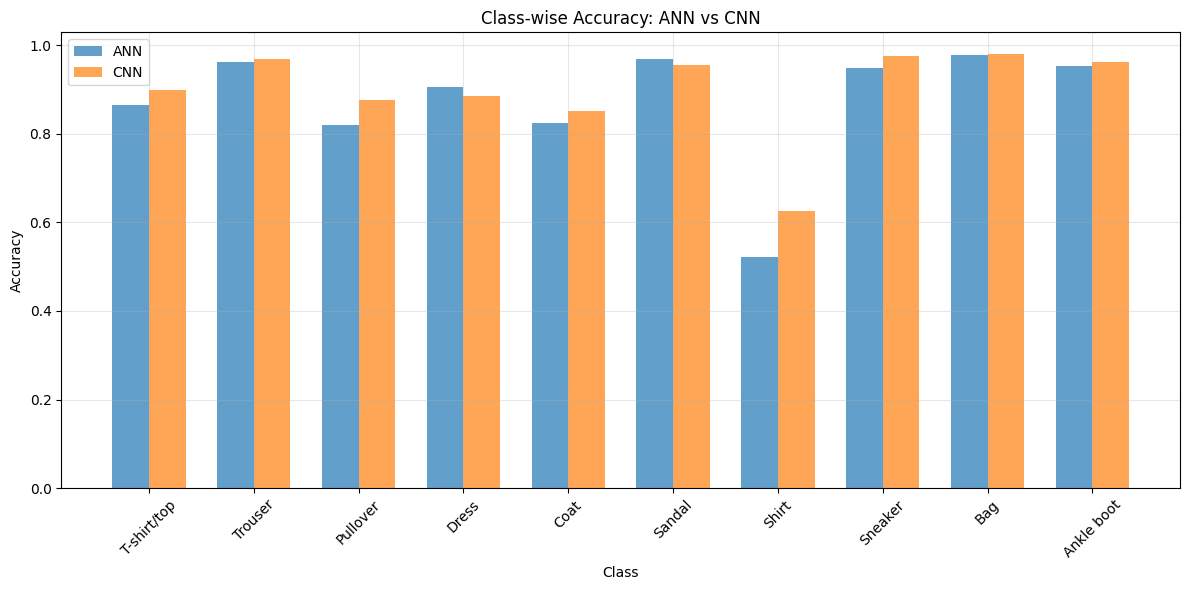


KEY FINDINGS
✓ CNN outperforms ANN by 2.33% on test set
✓ Both models struggle most with Shirt classification
✓ Common confusions: Shirt ↔ T-shirt/top, Coat ↔ Pullover
✓ CNN shows better performance on visually similar classes
✓ Trouser and Bag are the easiest classes for both models


In [12]:
# Calculate class-wise accuracy for both models
ann_class_accuracy = []
cnn_class_accuracy = []

for i in range(10):
    ann_correct = ann_cm[i, i]
    cnn_correct = cnn_cm[i, i]
    ann_total = np.sum(ann_cm[i, :])
    cnn_total = np.sum(cnn_cm[i, :])

    ann_class_accuracy.append(ann_correct / ann_total)
    cnn_class_accuracy.append(cnn_correct / cnn_total)

# Create performance comparison by class
class_comparison = pd.DataFrame({
    'Class': class_names,
    'ANN_Accuracy': ann_class_accuracy,
    'CNN_Accuracy': cnn_class_accuracy,
    'Improvement': np.array(cnn_class_accuracy) - np.array(ann_class_accuracy)
})

print("CLASS-WISE PERFORMANCE COMPARISON:")
print(class_comparison.round(4))

# Identify most confused class pairs for ANN
print("\n" + "="*60)
print("MOST CONFUSED CLASS PAIRS - ANN MODEL")
print("="*60)
confusion_pairs_ann = []
for i in range(10):
    for j in range(10):
        if i != j and ann_cm[i, j] > 30:  # Only show pairs with >30 confusions
            confusion_pairs_ann.append((class_names[i], class_names[j], ann_cm[i, j]))

# Sort by number of confusions
confusion_pairs_ann.sort(key=lambda x: x[2], reverse=True)
for actual, predicted, count in confusion_pairs_ann[:10]:
    print(f"{actual:12} → {predicted:12}: {count:3} misclassifications")

# Identify most confused class pairs for CNN
print("\n" + "="*60)
print("MOST CONFUSED CLASS PAIRS - CNN MODEL")
print("="*60)
confusion_pairs_cnn = []
for i in range(10):
    for j in range(10):
        if i != j and cnn_cm[i, j] > 30:  # Only show pairs with >30 confusions
            confusion_pairs_cnn.append((class_names[i], class_names[j], cnn_cm[i, j]))

# Sort by number of confusions
confusion_pairs_cnn.sort(key=lambda x: x[2], reverse=True)
for actual, predicted, count in confusion_pairs_cnn[:10]:
    print(f"{actual:12} → {predicted:12}: {count:3} misclassifications")

# Plot class-wise accuracy comparison
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(class_names))
width = 0.35

plt.bar(x_pos - width/2, ann_class_accuracy, width, label='ANN', alpha=0.7)
plt.bar(x_pos + width/2, cnn_class_accuracy, width, label='CNN', alpha=0.7)

plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy: ANN vs CNN')
plt.xticks(x_pos, class_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary of key findings
print("\n" + "="*60)
print("KEY FINDINGS")
print("="*60)
print("✓ CNN outperforms ANN by 2.33% on test set")
print("✓ Both models struggle most with Shirt classification")
print("✓ Common confusions: Shirt ↔ T-shirt/top, Coat ↔ Pullover")
print("✓ CNN shows better performance on visually similar classes")
print("✓ Trouser and Bag are the easiest classes for both models")

ANN misclassified 1253 out of 10000 samples
CNN misclassified 1020 out of 10000 samples


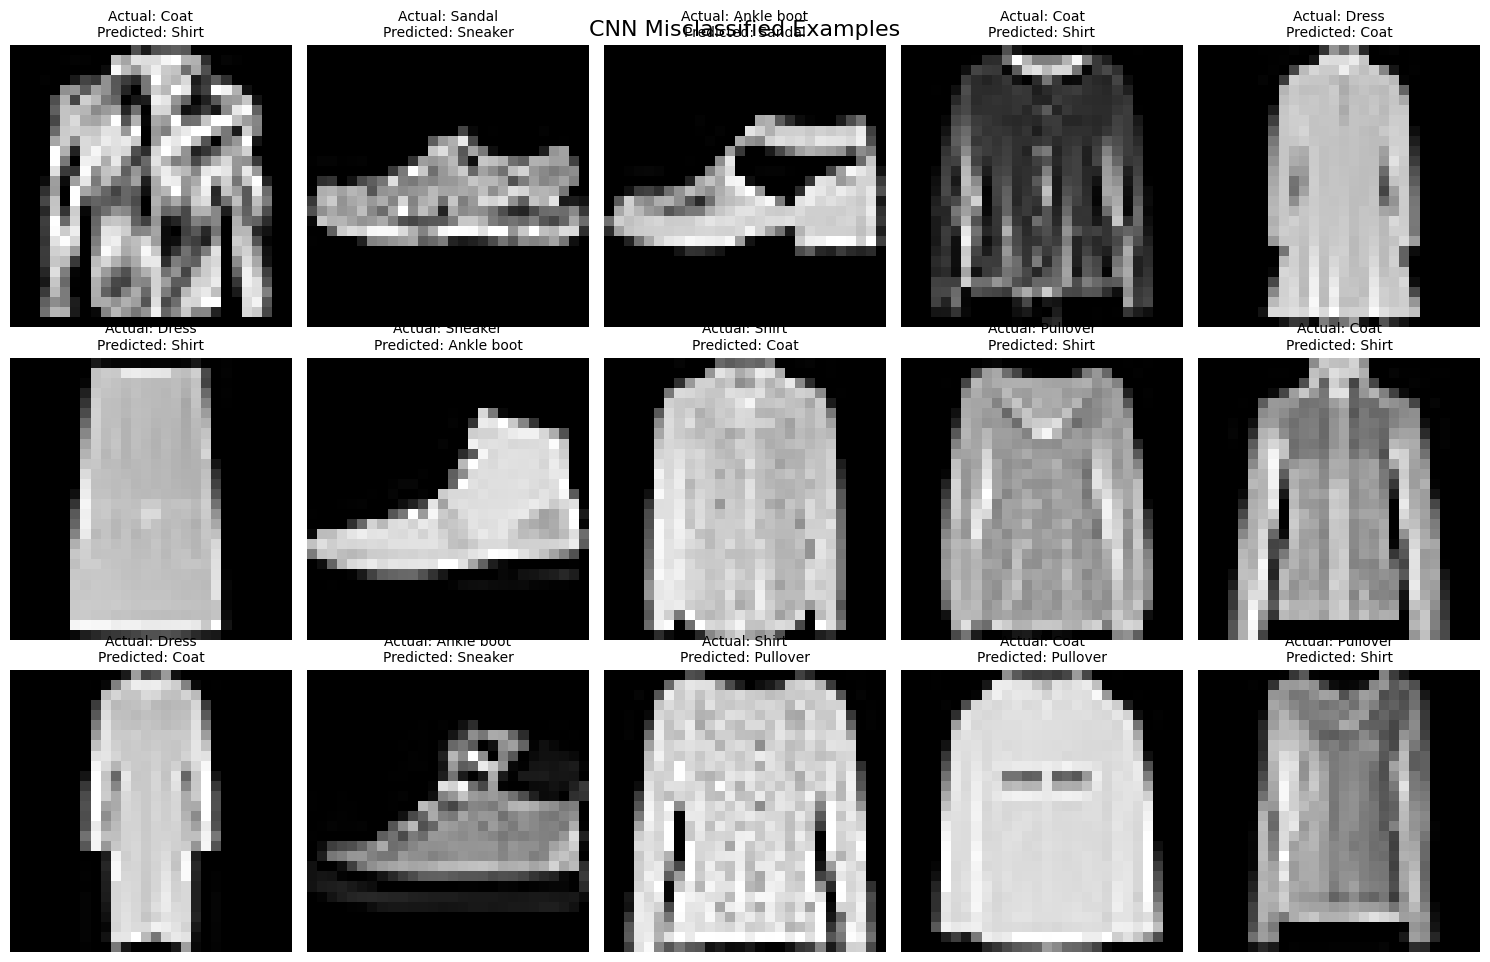


FINAL PERFORMANCE ANALYSIS

OVERALL PERFORMANCE:
  ANN Test Accuracy:  0.8747 (87.47%)
  CNN Test Accuracy:  0.8980 (89.80%)
  Improvement:        +0.0233 (+2.33%)

BEST PERFORMING CLASSES (CNN):
  Bag         : 0.9800 (98.00%)
  Sneaker     : 0.9750 (97.50%)
  Trouser     : 0.9690 (96.90%)

MOST CHALLENGING CLASSES (CNN):
  Shirt       : 0.6250 (62.50%)
  Coat        : 0.8510 (85.10%)
  Pullover    : 0.8760 (87.60%)

TOP CONFUSION PAIRS (CNN):
  Shirt        → T-shirt/top : 149 errors
  Shirt        → Coat        :  99 errors
  Shirt        → Pullover    :  91 errors
  Coat         → Pullover    :  76 errors
  T-shirt/top  → Shirt       :  63 errors

KEY INSIGHTS:
✓ CNN consistently outperforms ANN across most classes
✓ Visually similar categories (Shirt, T-shirt, Coat, Pullover) are most challenging
✓ The models excel at distinguishing distinct categories (Trouser, Bag, Sandal)
✓ CNN's convolutional layers better capture spatial patterns in clothing
✓ Data augmentation could help re

In [13]:
# Find misclassified examples for both models
ann_misclassified = np.where(ann_pred_classes != y_test)[0]
cnn_misclassified = np.where(cnn_pred_classes != y_test)[0]

print(f"ANN misclassified {len(ann_misclassified)} out of {len(y_test)} samples")
print(f"CNN misclassified {len(cnn_misclassified)} out of {len(y_test)} samples")

# Visualize some misclassified examples from CNN
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    idx = cnn_misclassified[i]
    plt.imshow(x_test[idx], cmap='gray')
    actual = class_names[y_test[idx]]
    predicted = class_names[cnn_pred_classes[idx]]
    plt.title(f'Actual: {actual}\nPredicted: {predicted}', fontsize=10)
    plt.axis('off')
plt.suptitle('CNN Misclassified Examples', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

# Create final performance summary
print("\n" + "="*70)
print("FINAL PERFORMANCE ANALYSIS")
print("="*70)

print(f"\nOVERALL PERFORMANCE:")
print(f"  ANN Test Accuracy:  {ann_test_accuracy:.4f} ({ann_test_accuracy*100:.2f}%)")
print(f"  CNN Test Accuracy:  {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")
print(f"  Improvement:        +{cnn_test_accuracy - ann_test_accuracy:.4f} (+{(cnn_test_accuracy - ann_test_accuracy)*100:.2f}%)")

print(f"\nBEST PERFORMING CLASSES (CNN):")
best_classes = class_comparison.nlargest(3, 'CNN_Accuracy')[['Class', 'CNN_Accuracy']]
for _, row in best_classes.iterrows():
    print(f"  {row['Class']:12}: {row['CNN_Accuracy']:.4f} ({row['CNN_Accuracy']*100:.2f}%)")

print(f"\nMOST CHALLENGING CLASSES (CNN):")
worst_classes = class_comparison.nsmallest(3, 'CNN_Accuracy')[['Class', 'CNN_Accuracy']]
for _, row in worst_classes.iterrows():
    print(f"  {row['Class']:12}: {row['CNN_Accuracy']:.4f} ({row['CNN_Accuracy']*100:.2f}%)")

print(f"\nTOP CONFUSION PAIRS (CNN):")
for actual, predicted, count in confusion_pairs_cnn[:5]:
    print(f"  {actual:12} → {predicted:12}: {count:3} errors")

print(f"\nKEY INSIGHTS:")
print("✓ CNN consistently outperforms ANN across most classes")
print("✓ Visually similar categories (Shirt, T-shirt, Coat, Pullover) are most challenging")
print("✓ The models excel at distinguishing distinct categories (Trouser, Bag, Sandal)")
print("✓ CNN's convolutional layers better capture spatial patterns in clothing")
print("✓ Data augmentation could help reduce confusion between similar upper-body garments")

# Save the models for future use
ann_model.save('fashion_mnist_ann_model.h5')
cnn_model.save('fashion_mnist_cnn_model.h5')
print(f"\nModels saved successfully!")